In [3]:
import numpy as np
from scipy.stats import sobol_indices, uniform
rng = np.random.default_rng()
def f_eq3(x):
    # x[0] = k, (0,1.50)
    # x[1] = gamma_g,
    # x[2] = rho
    # x[3] = drag/s_p
    # x[4] = mu
    # x[5] = C_0
    # x[6] = C_1
    k_1 = 135
    k_2 = 4.9 * 10**6
    C_0 = 0.768239429
    C_1 = -0.484686812

    
    f_eval = C_0 + C_1 * (x[0] * x[1] + (1 - x[1]) * (((-1 * k_2 * x[4]) / (2 * k_1 * (2 * x[2] * x[3]) ** (1/2))) + ((1/k_1) + ((k_2 * x[4]) ** 2 / (8 * (k_1** 2) * x[2] * x[3])))**(1/2))) 
    
    return f_eval
indices = sobol_indices(
    func=f_eq3, n=2**14,
    dists=[
        uniform(loc= 0, scale= 1.5),
        uniform(loc= 0, scale= 1),
        uniform(loc= 0.02, scale= 1.78),
        uniform(loc= 1, scale= 6999),
        uniform(loc= 1 * 10 **-5, scale= 1 * 10 **-5),
        #uniform(loc= 0.5, scale= 1),
        #uniform(loc=-1.5, scale= 3.5),
    ],
    random_state=rng
)
print("first order" , indices.first_order)
print("total order", indices.total_order)

first order [4.69406579e-01 3.74036204e-01 2.49706961e-05 2.44681741e-05
 7.19949321e-06]
total order [6.25861557e-01 5.30551504e-01 3.79978981e-05 6.82096127e-05
 5.21023802e-06]


In [4]:
boot = indices.bootstrap()

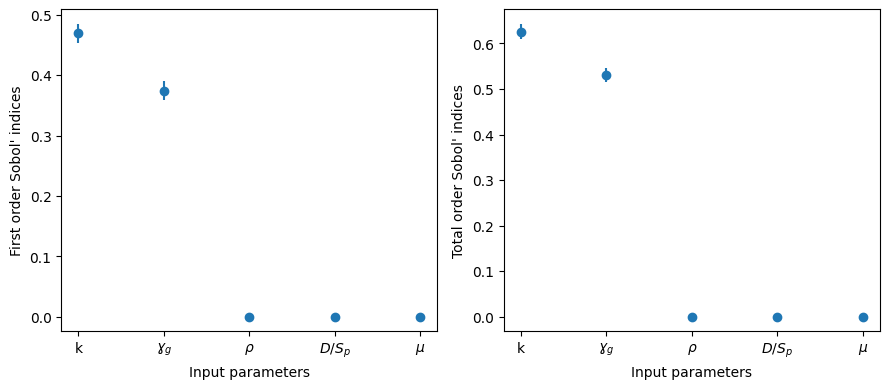

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
_ = axs[0].errorbar(
    ['k', '$ɣ_g$', '$ρ$', '$D/S_p$', '$μ$'], indices.first_order, fmt='o',
    yerr=[
        indices.first_order - boot.first_order.confidence_interval.low,
        boot.first_order.confidence_interval.high - indices.first_order
    ],
)
axs[0].set_ylabel("First order Sobol' indices")
axs[0].set_xlabel('Input parameters')
axs[0].set_xticks(['k', '$ɣ_g$', '$ρ$', '$D/S_p$', '$μ$'])
_ = axs[1].errorbar(
    ['k', '$ɣ_g$', '$ρ$', '$D/S_p$', '$μ$'], indices.total_order, fmt='o',
    yerr=[
        indices.total_order - boot.total_order.confidence_interval.low,
        boot.total_order.confidence_interval.high - indices.total_order
    ],
)
axs[1].set_ylabel("Total order Sobol' indices")
axs[1].set_xlabel('Input parameters')
axs[1].set_xticks(['k', '$ɣ_g$', '$ρ$', '$D/S_p$', '$μ$'])
plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import qmc

lower = [0, 0, 0.02, 1, 1 * 10**-5]
upper = [1.5, 1, 1.8, 7000, 2* 10**-5]

n_dim = 5
p_labels = ['k', '$ɣ_g$', '$ρ$', '$D/S_p$', '$μ$']
sample = qmc.Sobol(d=n_dim, seed=rng).random(1024)
sample = qmc.scale(
    sample=sample,
    l_bounds=lower,
    u_bounds=upper
)
output = f_eq3(sample.T)

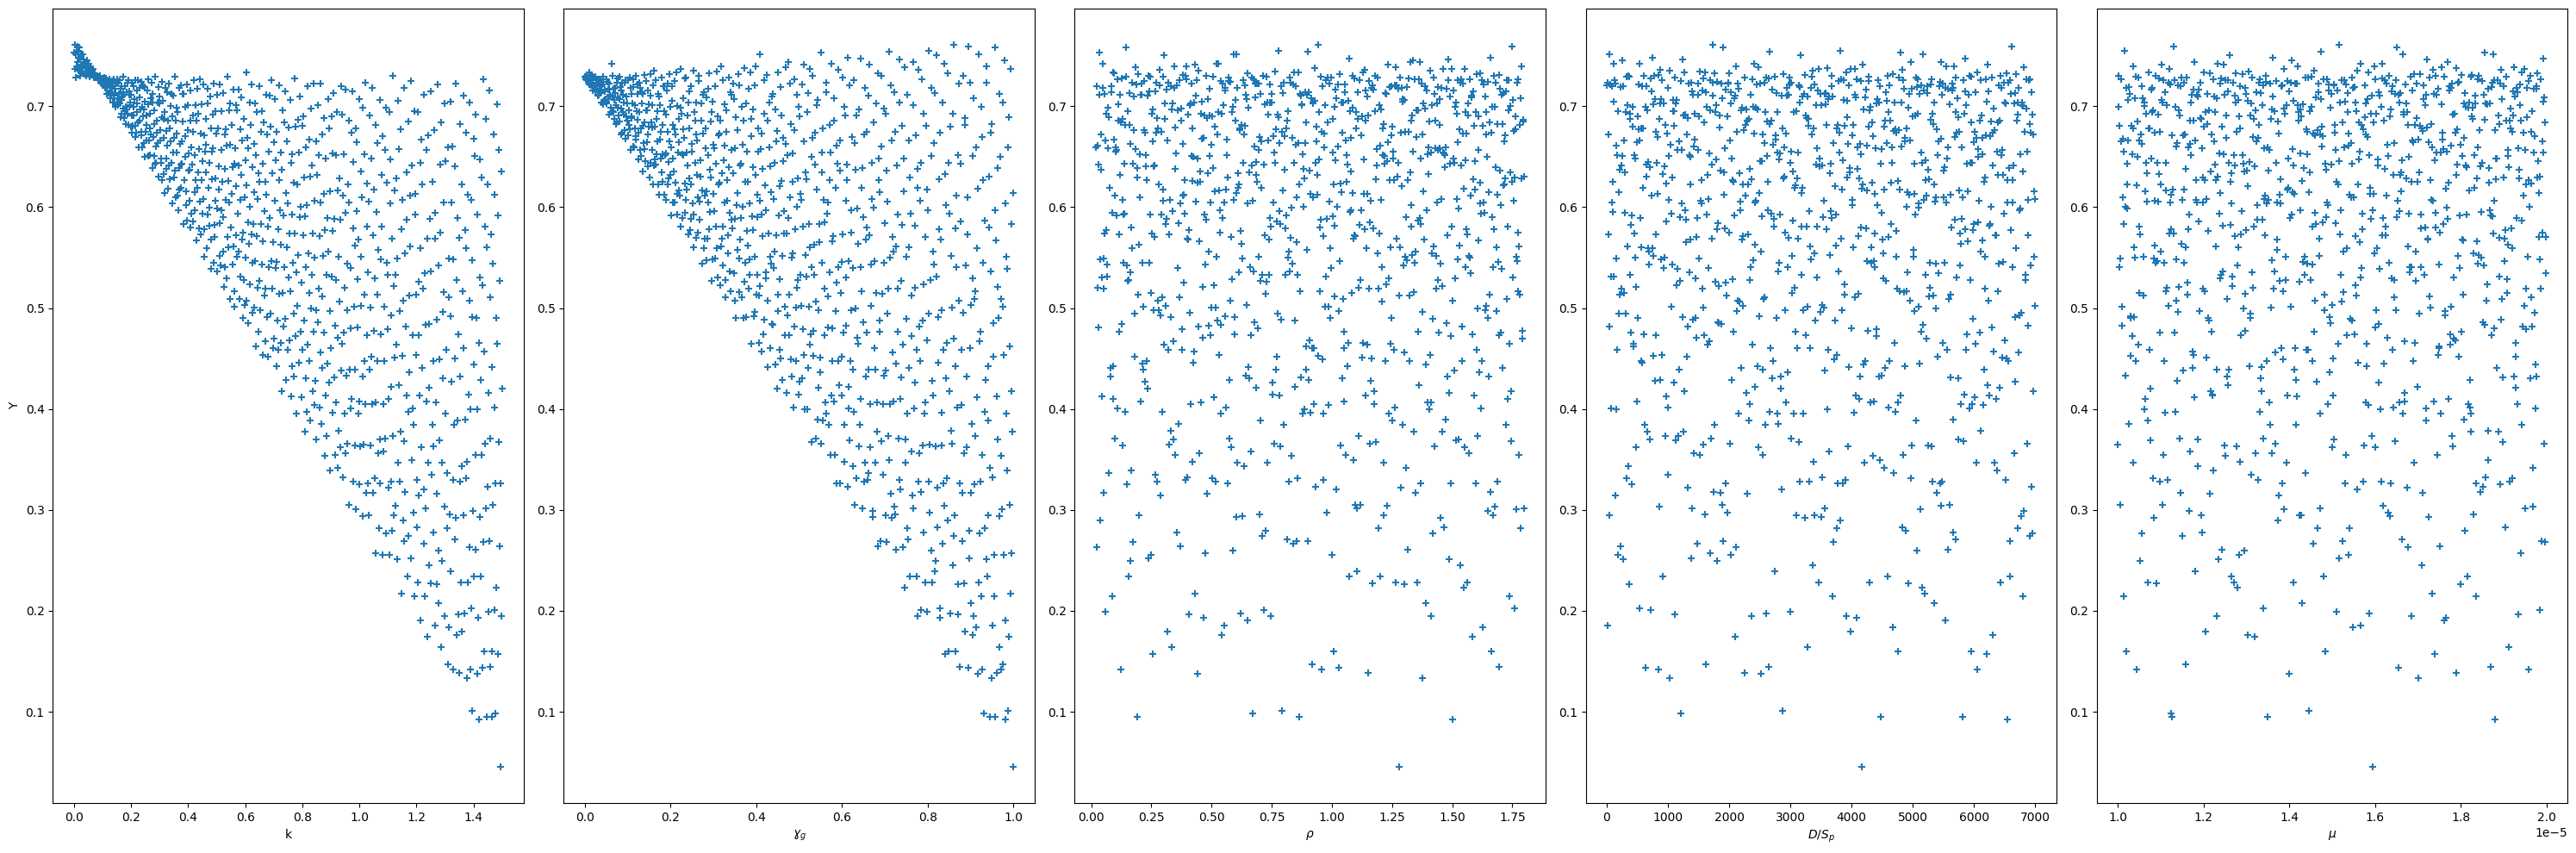

In [7]:
fig, ax = plt.subplots(1, n_dim, figsize=(30, 10))
for i in range(n_dim):
    xi = sample[:, i]
    ax[i].scatter(xi, output, marker='+')
    ax[i].set_xlabel(p_labels[i])
ax[0].set_ylabel('Y')
plt.tight_layout()
plt.show()

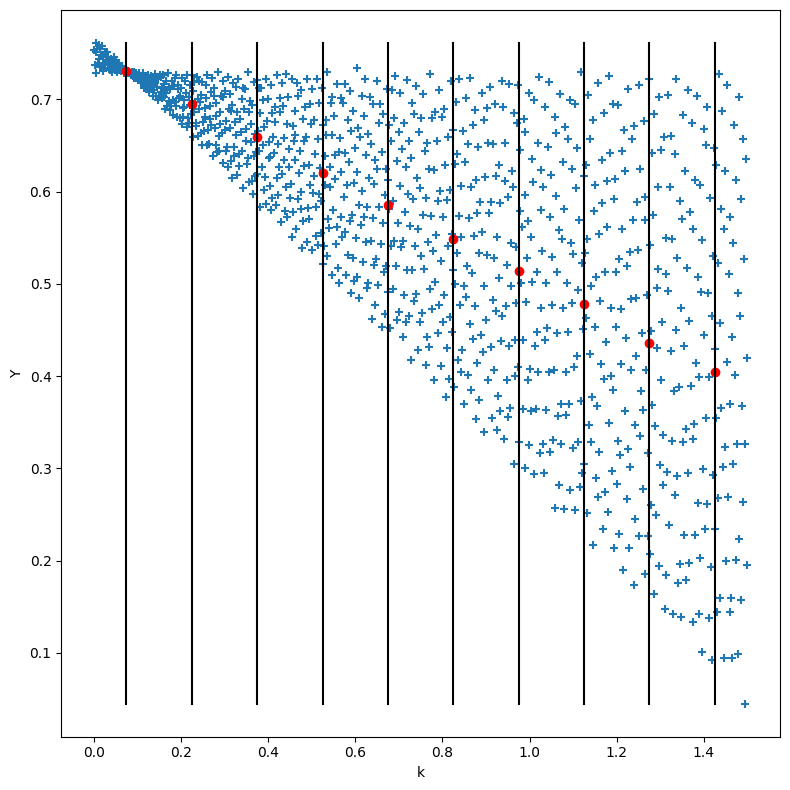

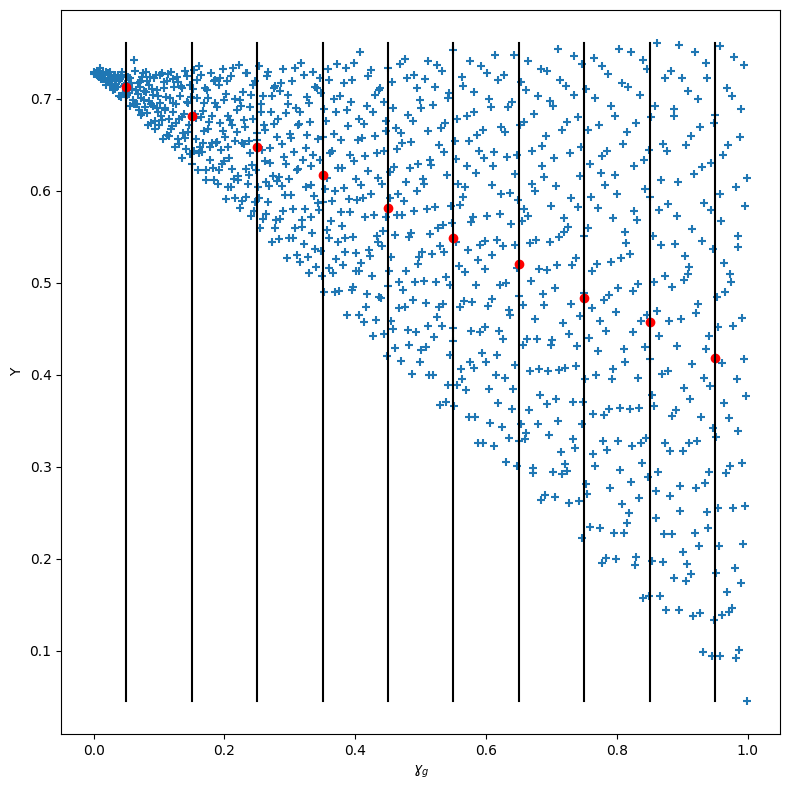

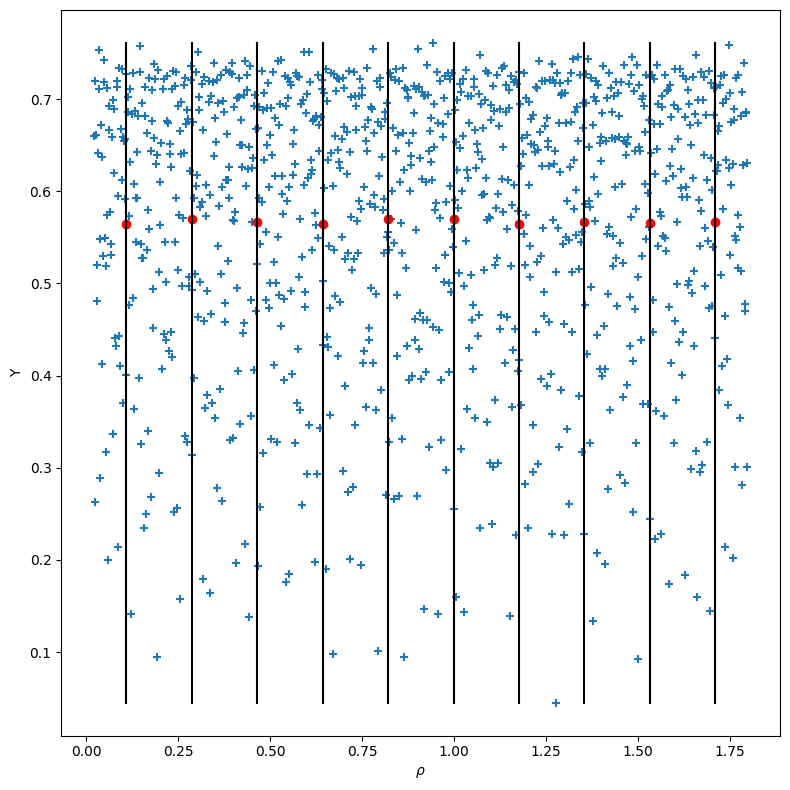

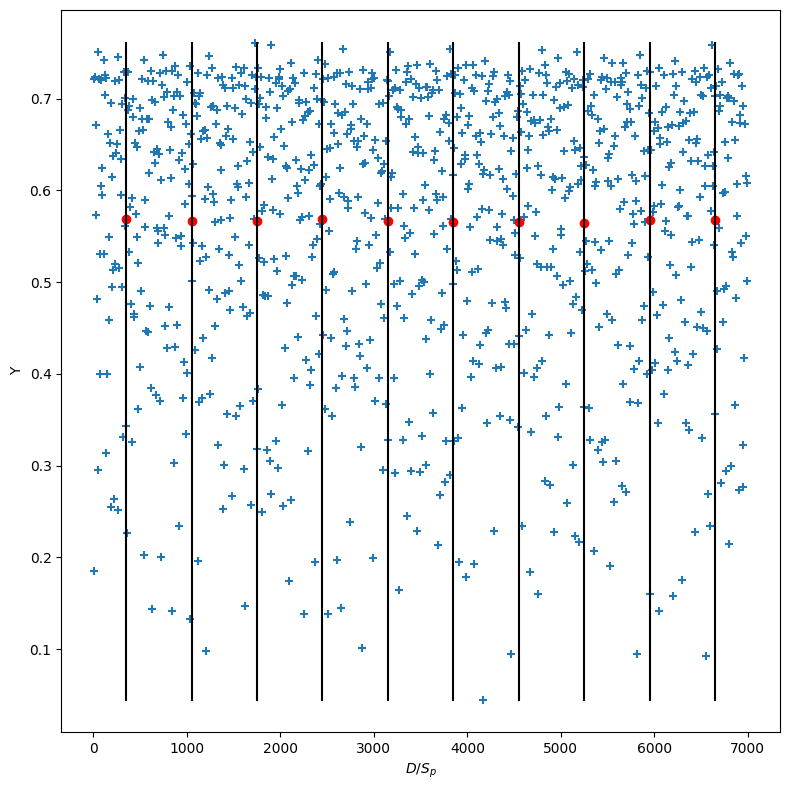

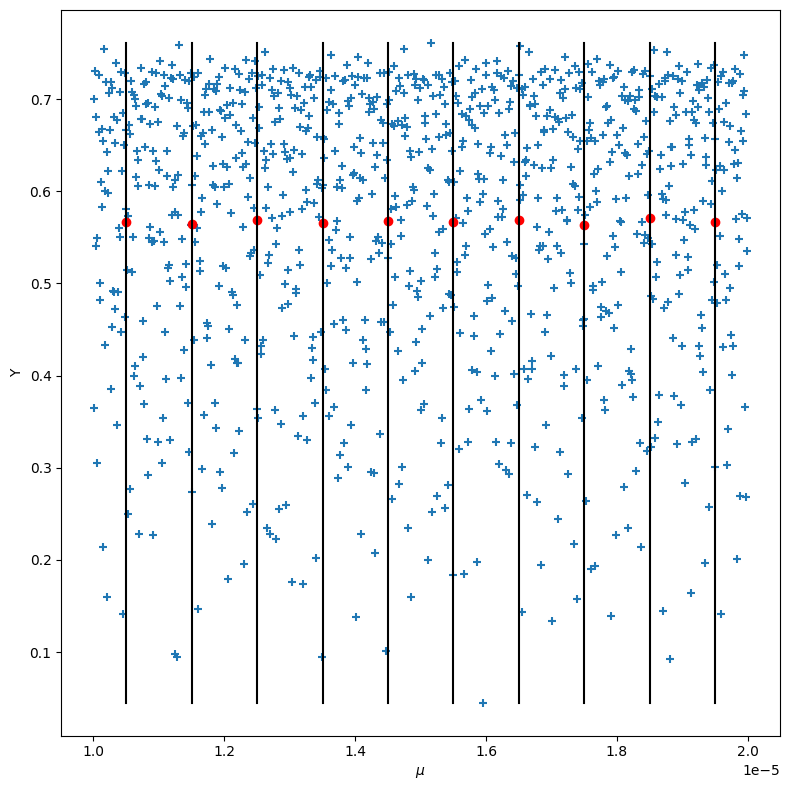

In [8]:
for z in range(n_dim):
    mini = np.min(output)
    maxi = np.max(output)
    n_bins = 10
    bins = np.linspace(lower[z], upper[z], num=n_bins, endpoint=False)
    dx = bins[1] - bins[0]
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    xi = sample[:, z]
    ax.scatter(xi, output, marker='+')
    ax.set_xlabel(p_labels[z])
    for bin_ in bins:
        idx = np.where((bin_ <= xi) & (xi <= bin_ + dx))
        xi_ = xi[idx]
        y_ = output[idx]
        ave_y_ = np.mean(y_)
        ax.plot([bin_ + dx/2] * 2, [mini, maxi], c='k')
        ax.scatter(bin_ + dx/2, ave_y_, c='r')
    ax.set_ylabel('Y')
    plt.tight_layout()
    plt.show()